In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab

In [52]:
dataset = pd.read_csv('heart.csv')
y = dataset.values[:,13]
y = np.array([y]).T
dataset.drop('target', inplace=True, axis=1)
dataset.insert(0, "bias", 1)
X = dataset.values
max1 = max(X[:,1])
max2 = max(X[:,4])
max3 = max(X[:,5])
max4 = max(X[:,8])
X[:,1] = X[:,1] / max1
X[:,4] = X[:,4] / max2
X[:,5] = X[:,5] / max3
X[:,8] = X[:,8] / max4
print(dataset)

     bias  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0       1   63    1   3       145   233    1        0      150      0   
1       1   37    1   2       130   250    0        1      187      0   
2       1   41    0   1       130   204    0        0      172      0   
3       1   56    1   1       120   236    0        1      178      0   
4       1   57    0   0       120   354    0        1      163      1   
..    ...  ...  ...  ..       ...   ...  ...      ...      ...    ...   
294     1   63    0   0       124   197    0        1      136      1   
295     1   59    1   0       164   176    1        0       90      0   
296     1   57    0   0       140   241    0        1      123      1   
297     1   45    1   3       110   264    0        1      132      0   
298     1   57    0   1       130   236    0        0      174      0   

     oldpeak  slope  ca  thal  
0        2.3      0   0     1  
1        3.5      0   0     2  
2        1.4      2   0    

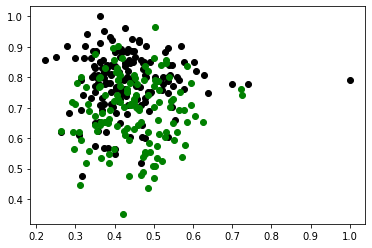

In [3]:
for i in range(len(y)):
    if y[i] == 1:
        c = 'k'
    else:
        c = 'g'
    plt.scatter(X[i,5], X[i,8], color=c)
plt.show()

### In my neural network i will use only 1 hidden layer, in total count... 1 input layer, 1 hidden layer with 5 units and 1 output layer with one unit for this regression problem

### We define our sigmoid function

In [40]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

### Create the sigmoid gradient function to make the back propagation

In [65]:
def sigmoidGradient(z):
    return sigmoid(z) * (1-sigmoid(z))

### Define a function to get a random initialization of our weights

In [42]:
def randomWeights(layerIn, layerOut, epsilon=0.12):
    matrix = np.random.rand(layerOut, layerIn + 1)
    matrix = np.dot(matrix, (epsilon*2))
    return matrix - epsilon

### Build the cost function considering the steps of... Fordward propagation, Calculate the cost and the backpropagation with the sigmoid gradient and return an historial of J(Cost) and the parametes Theta

In [71]:
# Dimensions:
# X : 299 x 14
# Theta1 : 5 x 14
def costFunction(X, y, Theta1, Theta2):
    m = len(y)
    
    # Fordward propagation
    z2 = np.dot(X,Theta1.T)
    a2 = sigmoid(z2)
    a2 = np.insert(a2, 0, np.ones(m), axis=1)
    z3 = np.dot(a2, Theta2.T)
    a3 = sigmoid(z3)
    hypotesisResult = a3
    
    # Cost function
    step1 = np.dot(y.T,np.log(hypotesisResult))
    step2 = np.dot((1-y.T),np.log(1-hypotesisResult))
    J = (-1/m) * np.sum(step1) + step2
    
    # Backpropagation
    delta3 = a3 - y
    step1Delta2 = np.dot(delta3, Theta2)
    step2Delta2 = np.insert(sigmoidGradient(z2), 0, np.ones(len(z2)), axis=1)
    delta2 = step1Delta2 * step2Delta2
    delta2 = np.delete(delta2, 0, 1)
    Theta1 = (1/m) * np.dot(delta2.T, X)
    Theta2 = (1/m) * np.dot(delta3.T, a2)
    
    return J, Theta1, Theta2

In [80]:
Theta1_init = randomWeights(13, 5)
Theta2_init = randomWeights(5, 1)

### Define a function to train the parameters theta (Weights)

In [46]:
def training(X, y, Theta1, Theta2, iterations=30):
    J_history = np.zeros(iterations)
    m = len(y)
    for it_fit in range(iterations):
        J_history[it_fit], Theta1, Theta2 = costFunction(X, y, Theta1, Theta2)
    return J_history, Theta1, Theta2

In [85]:
J_history, Theta1Fit, Theta2Fit = training(X, y, Theta1_init, Theta2_init, 5000)

### And here, we make a diagnostic of our training plotting the Cost in function of (m) iterations and... as you can see, the cost reduce it value in each iteration but in a moment, it get stuck, this is a problem of High Bias or Underfit, to solve this problem we need to try a different possible solution like, collect more data, collect more feautures and etc

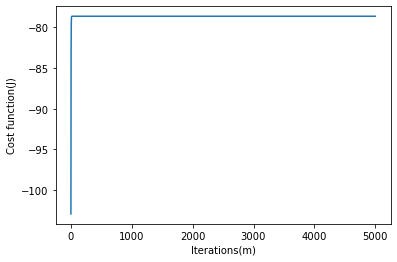

Last value of J: -78.62230522207156
Best value of J: -102.94085323563961
Position: 0


In [86]:
iterationsPlt = 5000
plt.plot(np.arange(iterationsPlt)+1, J_history)
pylab.xlabel("Iterations(m)")
pylab.ylabel("Cost function(J)")
plt.show()
print("Last value of J: " + str(J_history[iterationsPlt - 1]))
print("Best value of J: " + str(min(J_history)))
print("Position: " + str(np.argmin(J_history, axis=0)))

In [79]:
Theta1Fit.shape

(5, 14)